In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.nsga import NSGAGeneticAlgorithm
from src.crossovers import mean_crossover
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 300
DIMENSION_SIZE = 3
CONSTRAINTS = (-4, 4)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

In [4]:
from typing import Sequence


def function_1(pop: Sequence[float]):
    first = np.power(pop - 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

def function_2(pop: Sequence[float]):
    first = np.power(pop + 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

In [5]:
algo = NSGAGeneticAlgorithm(
    state=current_state,
    eval_functions=[function_1, function_2],
    mutation_function=square_mutation,
    mating_function=mean_crossover,
)

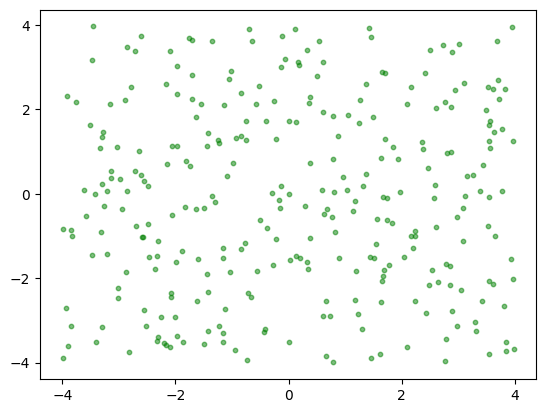

In [6]:
x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [7]:
algo.get_best()

[[0.5958067361867077, 0.10293014475030127, 0.435814464575472],
 [0.005672946670356893, 0.007116033229406682, 0.871224830533925],
 [-0.29979018158483406, 0.020948513301724425, -0.10206765006247842],
 [-0.16605614502530397, -0.14266383610231603, 0.21236332834888128],
 [-0.3901042868708844, -0.8147553611786753, -0.3400983102484112]]

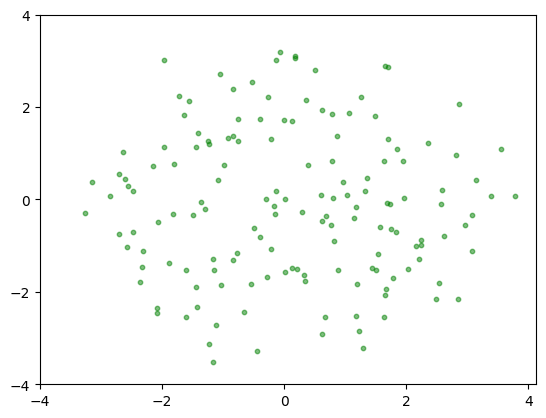

In [8]:
algo.select(keep_share=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

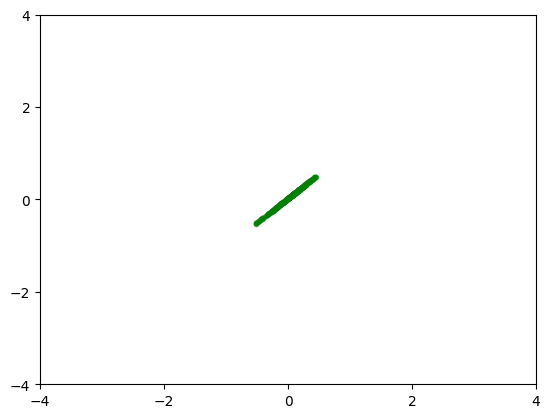

In [9]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()